In [2]:
# Librerías principales para señales y sistemas
import numpy as np              # Para manejo de arreglos y funciones matemáticas
import matplotlib.pyplot as plt # Para graficar funciones continuas y discretas
from scipy import signal        # Para manipulación de señales (útil en la materia)
import sympy as sp
from scipy.interpolate import interp1d

# Opcional: para mostrar gráficos en Jupyter Notebook
# %matplotlib inline

fdghdfgdfgdfsgdsfgsdfgdsf
fsda;jfnasdlkjfbnsadlkjfbasdlkjfnsda
dsklfjsadlkjb
$$
ax + b = y
$$


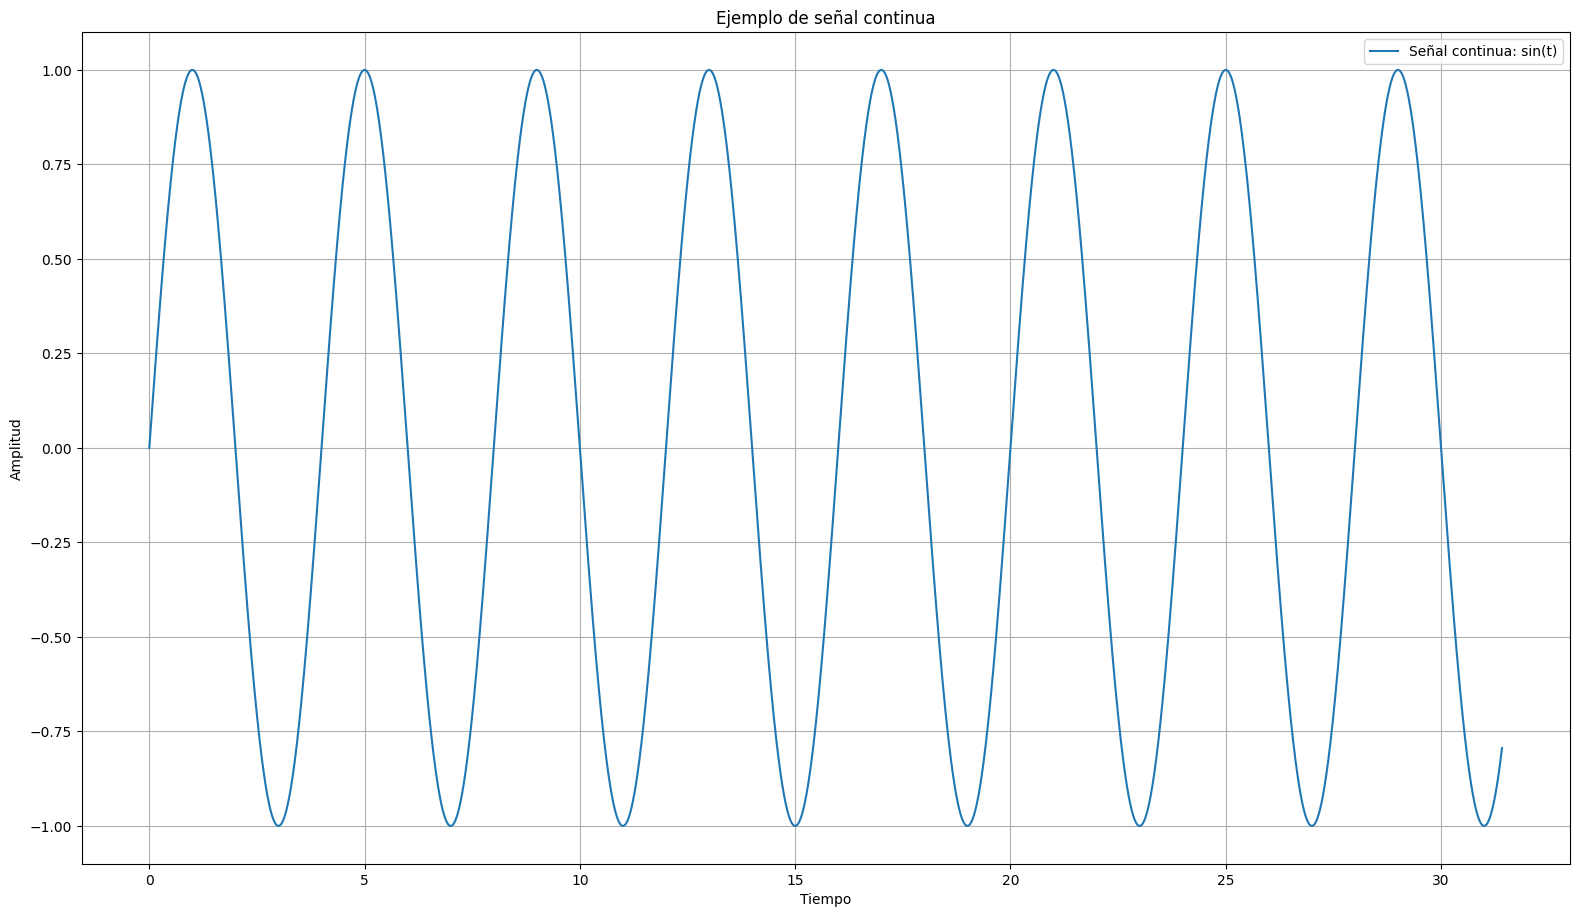

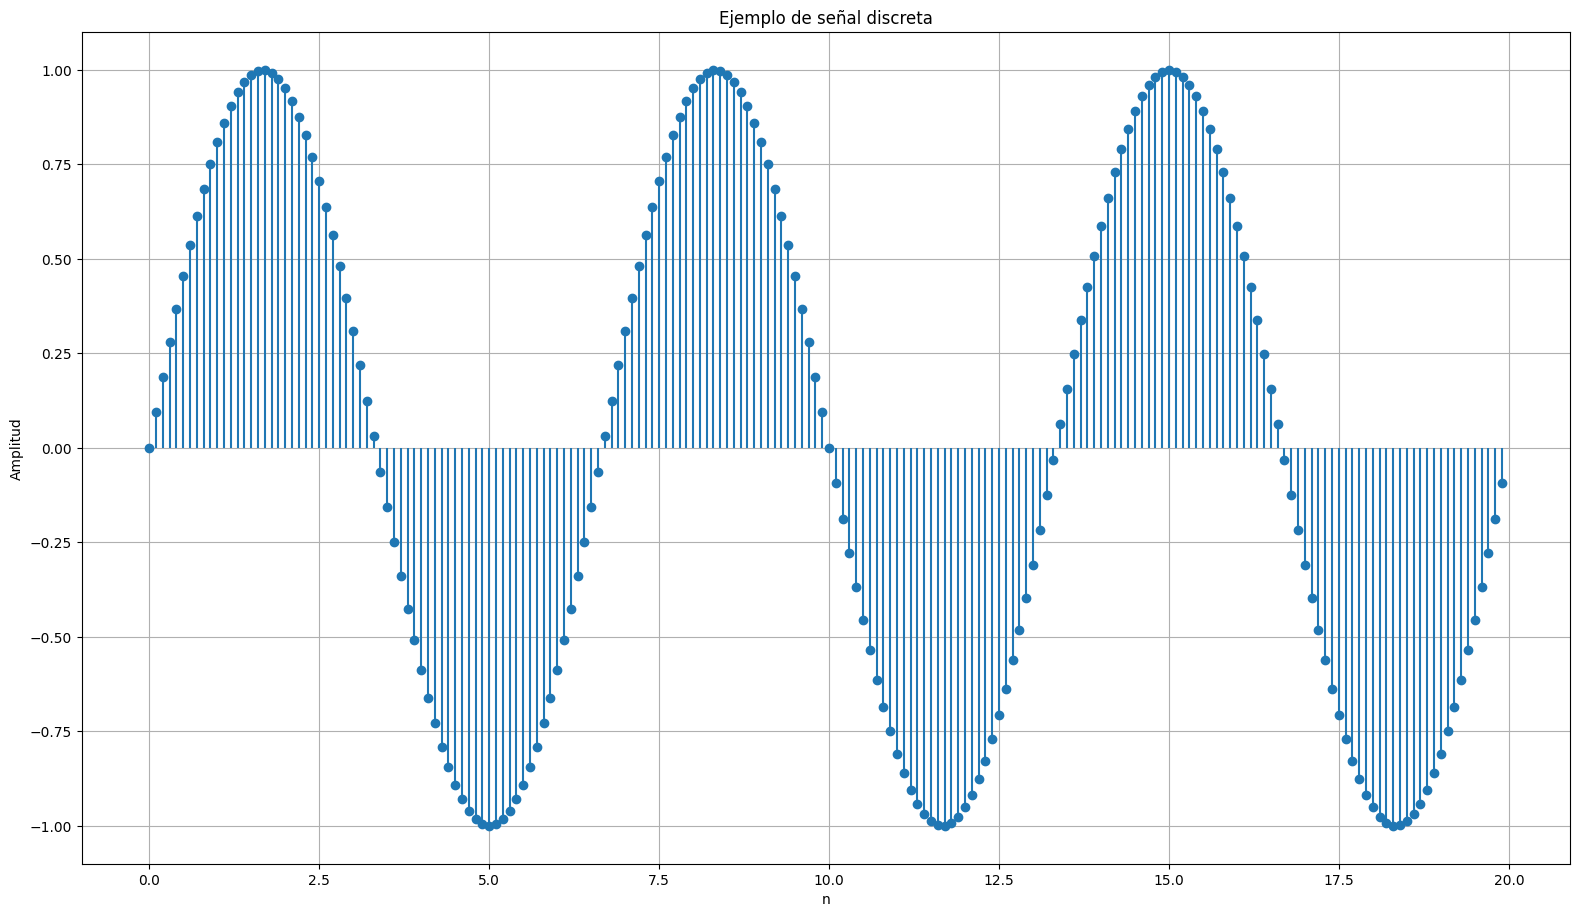

In [ ]:
# Señal continua: seno 
t = np.linspace(0,10*np.pi, 100000)   # Tiempo continuo
x_cont = np.sin((np.pi/6) * t)            # Señal continua

plt.figure(figsize=(19.20,10.8))
plt.plot(t, x_cont, label='Señal continua: sin(t)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Ejemplo de señal continua')
plt.legend()
plt.grid(True)
plt.savefig('senal_continua.png', dpi=100)  # Guarda la imagen en alta resolución, multiplica cada aspecto por el dpi
plt.show()

# Señal discreta: seno muestreado
n = np.arange(0, 20, 0.1)             # Índices discretos
x_disc = np.sin(0.3 * np.pi * n)    # Señal discreta

plt.figure(figsize=(19.20,10.8))
plt.stem(n, x_disc, basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Ejemplo de señal discreta')
plt.grid(True)
plt.savefig('senal_discreta.png', dpi=100)
plt.show()

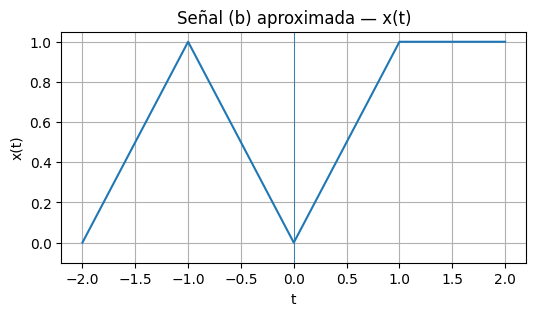

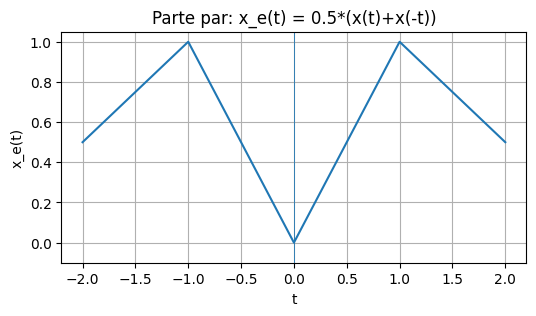

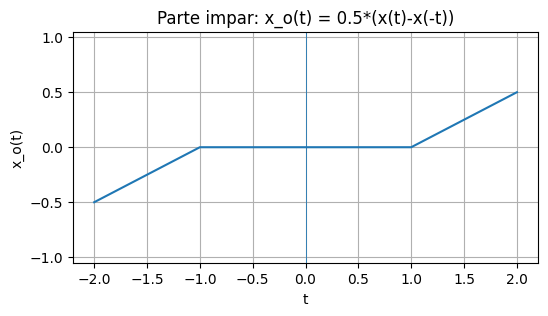

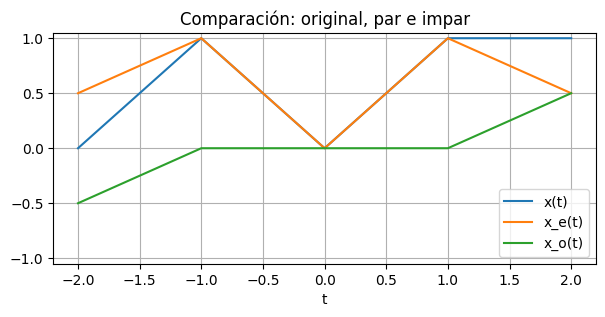

t (primeras 8): [-2.    -1.996 -1.992 -1.988 -1.984 -1.98  -1.976 -1.972]
x   (primeras 8): [0.    0.004 0.008 0.012 0.016 0.02  0.024 0.028]
x_e (primeras 8): [0.5   0.502 0.504 0.506 0.508 0.51  0.512 0.514]
x_o (primeras 8): [-0.5   -0.498 -0.496 -0.494 -0.492 -0.49  -0.488 -0.486]


In [ ]:

# Defino el eje temporal
t = np.linspace(-2.0, 2.0, 1001)

# Defino una señal pieza a pieza que aproxima la figura (b).
def x_of_t(t):
    x = np.zeros_like(t)
    # Triángulo: sube de 0 a 1 entre t=-2 y t=-1
    mask = (t >= -2) & (t < -1)
    x[mask] = (t[mask] + 2) / 1  # de 0 a 1

    # Triángulo: baja de 1 a 0 entre t=-1 y t=0
    mask = (t >= -1) & (t < 0)
    x[mask] = -(t[mask] / 1)  # de 1 a 0

    # Recta: sube de 0 a 1 entre t=0 y t=1
    mask = (t >= 0) & (t < 1)
    x[mask] = t[mask] / 1  # de 0 a 1

    # Constante: de t=1 a t=2, valor 1
    mask = (t >= 1) & (t <= 2)
    x[mask] = 1

    return x

x = x_of_t(t)

# Funcion general que, dada una señal muestreada (t, x), calcule las partes par e impar.
def even_odd_parts(t, x):
    """
    Devuelve x_even(t) y x_odd(t) usando interpolación para obtener x(-t).
    t: vector monotónicamente creciente de tiempos
    x: vector de muestras correspondiente
    """
    # Interpolador (extrapolamos con 0 fuera del rango)
    interp = interp1d(t, x, bounds_error=False, fill_value=0.0)
    x_mirror = interp(-t)              # x(-t) evaluado en los mismos instantes t
    x_even = 0.5 * (x + x_mirror)
    x_odd  = 0.5 * (x - x_mirror)
    return x_even, x_odd

x_even, x_odd = even_odd_parts(t, x)

# Grafico 1: señal original
plt.figure(figsize=(6,3))
plt.plot(t, x)
plt.axvline(0, linewidth=0.6)
plt.title("Señal (b) aproximada — x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim(-0.1, 1.05)
plt.grid(True)
plt.show()

# Grafico 2: parte par
plt.figure(figsize=(6,3))
plt.plot(t, x_even)
plt.axvline(0, linewidth=0.6)
plt.title("Parte par: x_e(t) = 0.5*(x(t)+x(-t))")
plt.xlabel("t")
plt.ylabel("x_e(t)")
plt.ylim(-0.1, 1.05)
plt.grid(True)
plt.show()

# Grafico 3: parte impar
plt.figure(figsize=(6,3))
plt.plot(t, x_odd)
plt.axvline(0, linewidth=0.6)
plt.title("Parte impar: x_o(t) = 0.5*(x(t)-x(-t))")
plt.xlabel("t")
plt.ylabel("x_o(t)")
plt.ylim(-1.05, 1.05)
plt.grid(True)
plt.show()

# También muestro las tres en un mismo gráfico para comparar (opcional)
plt.figure(figsize=(7,3))
plt.plot(t, x, label="x(t)")
plt.plot(t, x_even, label="x_e(t)")
plt.plot(t, x_odd, label="x_o(t)")
plt.legend()
plt.title("Comparación: original, par e impar")
plt.xlabel("t")
plt.grid(True)
plt.ylim(-1.05, 1.05)
plt.show()

# Imprimo un pequeño resumen numérico (primeras 8 muestras)
print("t (primeras 8):", np.round(t[:8],3))
print("x   (primeras 8):", np.round(x[:8],3))
print("x_e (primeras 8):", np.round(x_even[:8],3))
print("x_o (primeras 8):", np.round(x_odd[:8],3))

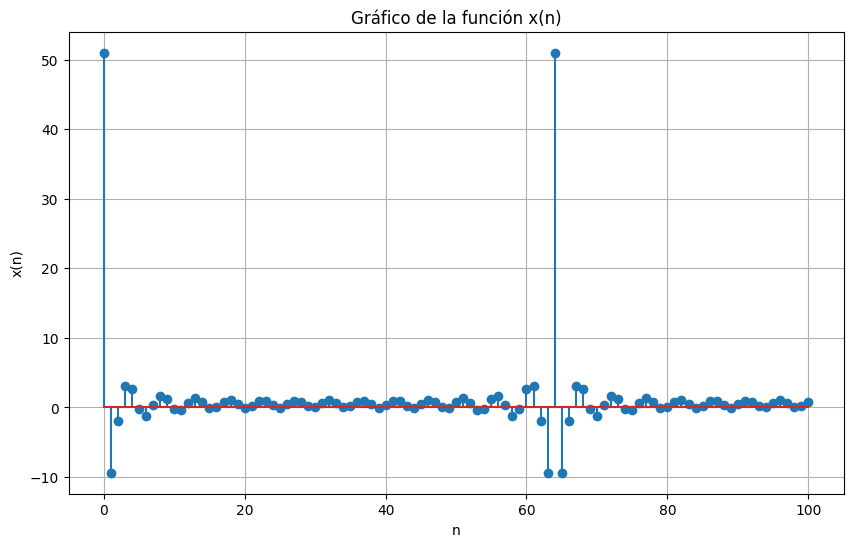

In [3]:

def x(n):
    k_values = np.arange(0, 51)
    terms = np.cos(np.pi * k_values * n / 32)
    return np.sum(terms)

# Definir el rango de valores para n
n_values = np.arange(0, 101)

# Calcular los valores de la función para cada n
x_n_values = [x(n) for n in n_values]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.stem(n_values, x_n_values)
plt.title('Gráfico de la función x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

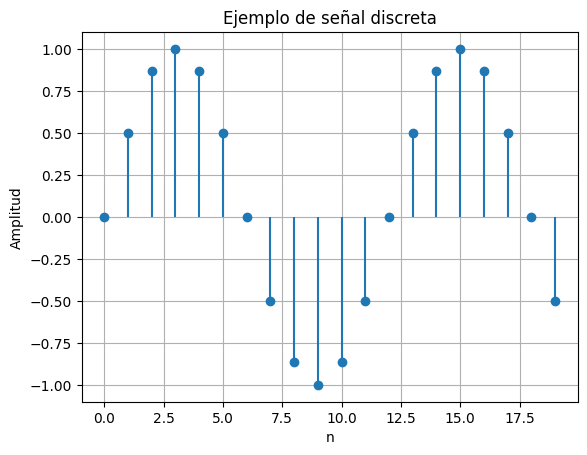

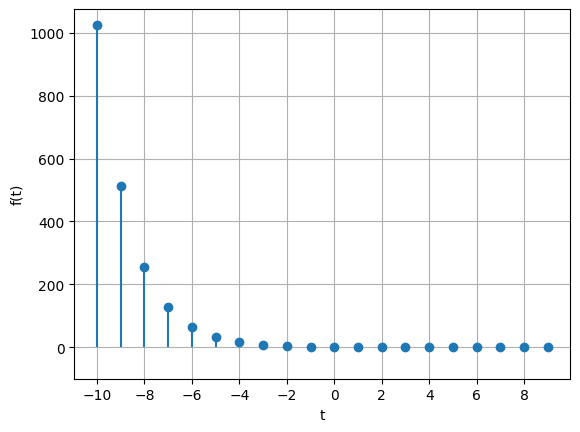

In [22]:

# Señal discreta: seno muestreado
n = np.arange(0, 20, 1)             # Índices discretos
x_disc = np.sin((1/6) * np.pi * n)    # Señal discreta

plt.figure()
plt.stem(n, x_disc, basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Ejemplo de señal discreta')
plt.grid(True)
plt.savefig('senal_discreta.png', dpi=100)
plt.show()


def escalon(t):
    return np.where(t>= 0, 1, 0)

t = np.arange(-10,10,1)
fdt = (2.0**-t) * escalon(-t + 2) 

plt.figure()
plt.stem(t, fdt,basefmt=" ")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.ylim(-100)
plt.xticks(np.arange(-10, 10, 2))
plt.grid(True)
plt.show()



$$ x(n) = \sum_{k=0}^{50} \cos\left(\frac{\pi k}{32} n\right) $$


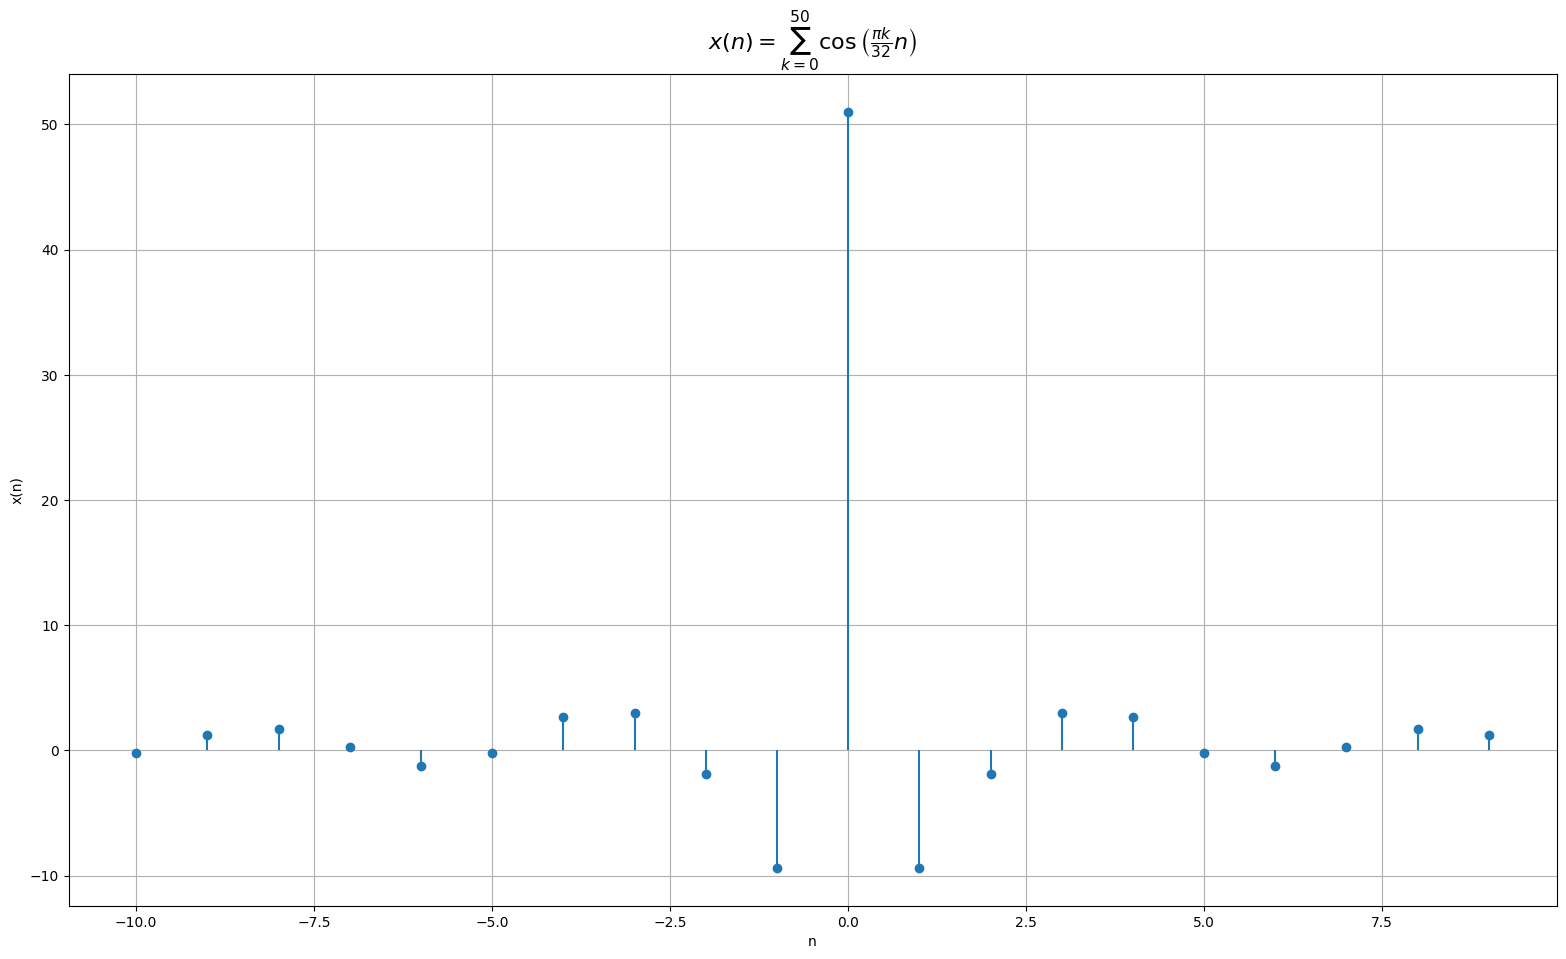

In [23]:
def x(n):
    k_values = np.arange(0, 51)
    terms = np.cos(np.pi * k_values * n / 32)
    return np.sum(terms)

# Definir el rango de valores para n
n_values = np.arange(-10, 10)

# Calcular los valores de la función para cada n
x_n_values = [x(n) for n in n_values]

# Crear el gráfico
plt.figure(figsize=(19.20, 10.80))
plt.stem(n_values, x_n_values,basefmt=" ")
plt.title(r"$x(n) = \sum_{k=0}^{50} \cos\left(\frac{\pi k}{32} n\right)$", fontsize=16)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

Resultado de la convolución: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.83907153 -1.75020179
 -1.0566303   0.60840222  1.71407254  1.24383247 -0.36998144 -1.64363612
 -1.40613933  0.12415547  1.54030231  1.54030231  0.12415547 -1.40613933
 -1.64363612 -0.36998144  1.24383247  1.71407254  0.60840222 -1.0566303
 -0.91113026  0.          0.          0.          0.          0.
  0.          0.          0.        ]


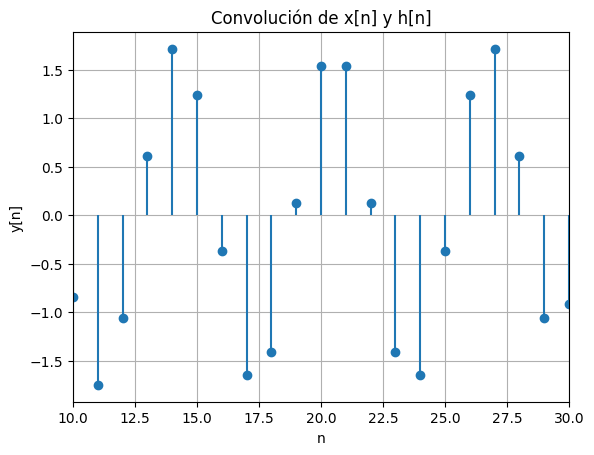

In [40]:
# Señales de ejemplo
x = np.arange(-10, 10, 1)
h = np.arange(-10, 10, 1)

fdx = np.cos(x)

def escalon(t):
    return np.where(t>= 0, 1, 0)

hdx = escalon(h) - escalon(h-2)

# Convolución
y = np.convolve(fdx, hdx, mode='full')  # 'full' es la convolución completa
f = np.arange(len(y))

print("Resultado de la convolución:", y)

# Graficar
plt.stem(f, y, basefmt=" ")
plt.xlabel('n')
plt.ylabel('y[n]')
plt.xlim(10,30)
plt.title('Convolución de x[n] y h[n]')
plt.grid(True)
plt.show()

